# Regresión lineal

El siguiente dataset es la unión de los autos de la marca Audi, Bmw, Hyundi, Merc y Toyota.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
dataframe = pd.read_csv('../data/autos.csv')

## Exploring the data

In [3]:
dataframe.head()

,Unnamed: 0,model,year,price,transmission,Brand
0,0,A1,2017,12500,Manual,Audi
1,1,A6,2016,16500,Automatic,Audi
2,2,A1,2016,11000,Manual,Audi
3,3,A4,2017,16800,Automatic,Audi
4,4,A3,2019,17300,Manual,Audi


Veamos la correlación entre las variables numéricas.

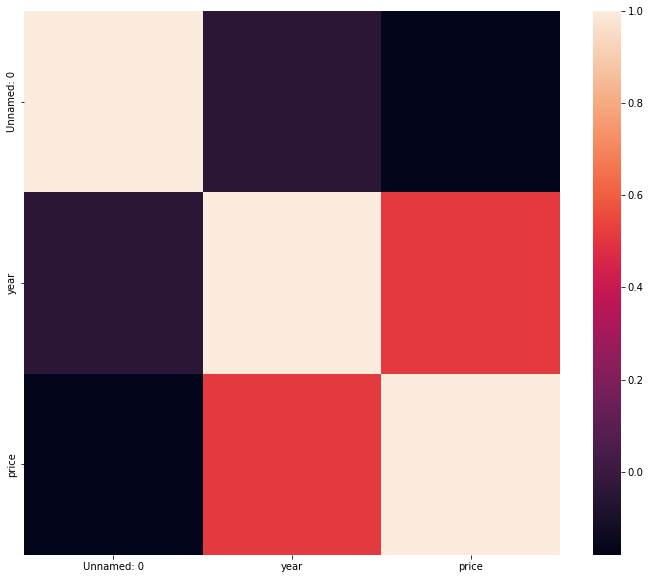

In [4]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(dataframe.corr())

Eliminamos la variable unnamed, dado que ya poseemos el índice en el dataframe.

In [5]:
dataframe = dataframe.drop(columns=['Unnamed: 0'])

C:\Users\PC\.conda\envs\IA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


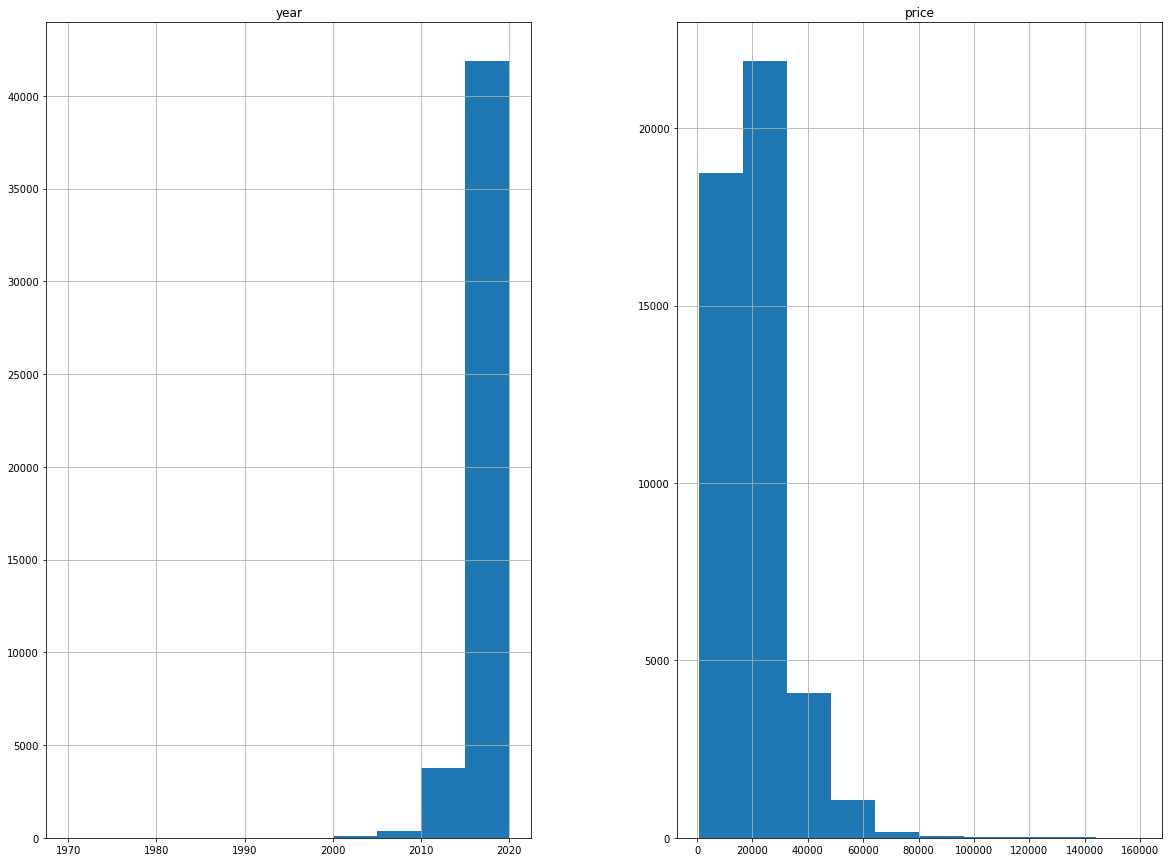

In [6]:
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
dataframe.hist(ax=ax)
plt.show()

## Separación de las variables objeto

In [7]:
dataframe.dtypes

model           object
year             int64
price            int64
transmission    object
Brand           object
dtype: object

In [8]:
dataframe = pd.get_dummies(data=dataframe, columns=['model', 'transmission', 'Brand'])

In [9]:
dataframe.shape

(46053, 98)

## Separar variables de prueba y predicción

In [10]:
data = dataframe.drop('price', axis=1)
label = dataframe['price']

In [11]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_label, test_label = train_test_split(data, label, test_size=0.85)

## Modelo 1 : Ridge

In [12]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge

In [13]:
model_1 = Ridge(alpha=1.0)
model_1.fit(train_dataset, train_label)

Ridge()

In [14]:
model_1.score(test_dataset, test_label)

0.75238356895973

In [15]:
prediction = model_1.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

5850.420646255111

## Modelo 2 : XGboost

In [16]:
import xgboost as xg

In [17]:
model_2 = xg.XGBRegressor(objective = 'reg:linear', n_estimators=10, seed=123)
model_2.fit(train_dataset, train_label)

[13:00:52] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
model_2.score(test_dataset, test_label)

0.7352489680723411

In [19]:
prediction = model_2.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

6049.4542126701335

## Modelo Three --> ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet
model_3 = ElasticNet(random_state=0)
model_3.fit(train_dataset, train_label)

ElasticNet(random_state=0)

In [21]:
prediction = model_3.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

8934.19245998226

## Modelo Four --> Neural Network (N.N.)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [24]:
model_4 = Sequential()

model_4.add(Dense(38, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1))

model_4.compile(optimizer='adam', loss='mse')

In [25]:
model_4.fit(x=train_dataset, y=train_label, epochs=600, validation_data=(test_dataset, test_label), callbacks=[early_stop])

Epoch 1/600
216/216 [==============================] - 2s 10ms/step - loss: 505107648.0000 - val_loss: 459913152.0000
Epoch 2/600
216/216 [==============================] - 2s 8ms/step - loss: 357771328.0000 - val_loss: 279799520.0000
Epoch 3/600
216/216 [==============================] - 2s 8ms/step - loss: 214685040.0000 - val_loss: 171362256.0000
Epoch 4/600
216/216 [==============================] - 2s 8ms/step - loss: 166425744.0000 - val_loss: 145952272.0000
Epoch 5/600
216/216 [==============================] - 2s 10ms/step - loss: 162016816.0000 - val_loss: 141329120.0000
Epoch 6/600
216/216 [==============================] - 2s 11ms/step - loss: 162677920.0000 - val_loss: 141641152.0000
Epoch 7/600
216/216 [==============================] - 2s 11ms/step - loss: 161714896.0000 - val_loss: 141151408.0000
Epoch 8/600
216/216 [==============================] - 2s 8ms/step - loss: 161441984.0000 - val_loss: 141602992.0000
Epoch 9/600
216/216 [==============================] - 2s 8m

216/216 [==============================] - 2s 9ms/step - loss: 158465248.0000 - val_loss: 138242080.0000
Epoch 71/600
216/216 [==============================] - 1s 7ms/step - loss: 159795760.0000 - val_loss: 138443616.0000
Epoch 72/600
216/216 [==============================] - 2s 8ms/step - loss: 159875712.0000 - val_loss: 138510624.0000
Epoch 73/600
216/216 [==============================] - 2s 8ms/step - loss: 159669024.0000 - val_loss: 138350864.0000
Epoch 74/600
216/216 [==============================] - 2s 8ms/step - loss: 158791136.0000 - val_loss: 138137264.0000
Epoch 75/600
216/216 [==============================] - 2s 8ms/step - loss: 157405600.0000 - val_loss: 138387536.0000
Epoch 76/600
216/216 [==============================] - 2s 8ms/step - loss: 156566032.0000 - val_loss: 137317152.0000
Epoch 77/600
216/216 [==============================] - 2s 8ms/step - loss: 155739376.0000 - val_loss: 137982752.0000
Epoch 78/600
216/216 [==============================] - 2s 8ms/step -

216/216 [==============================] - 2s 8ms/step - loss: 154033616.0000 - val_loss: 133313584.0000
Epoch 140/600
216/216 [==============================] - 2s 8ms/step - loss: 154186848.0000 - val_loss: 132669520.0000
Epoch 141/600
216/216 [==============================] - 2s 9ms/step - loss: 153730096.0000 - val_loss: 132598376.0000
Epoch 142/600
216/216 [==============================] - 2s 8ms/step - loss: 153694752.0000 - val_loss: 132603544.0000
Epoch 143/600
216/216 [==============================] - 2s 8ms/step - loss: 152854576.0000 - val_loss: 133135224.0000
Epoch 144/600
216/216 [==============================] - 2s 8ms/step - loss: 154731632.0000 - val_loss: 133126136.0000
Epoch 145/600
216/216 [==============================] - 2s 8ms/step - loss: 153920336.0000 - val_loss: 131997456.0000
Epoch 146/600
216/216 [==============================] - 2s 8ms/step - loss: 150813760.0000 - val_loss: 131826704.0000
Epoch 147/600
216/216 [==============================] - 2s 9m

Epoch 208/600
216/216 [==============================] - 2s 8ms/step - loss: 140438288.0000 - val_loss: 121165320.0000
Epoch 209/600
216/216 [==============================] - 2s 8ms/step - loss: 145395328.0000 - val_loss: 122517528.0000
Epoch 210/600
216/216 [==============================] - 2s 9ms/step - loss: 142508432.0000 - val_loss: 120255152.0000
Epoch 211/600
216/216 [==============================] - 2s 8ms/step - loss: 140751328.0000 - val_loss: 121323784.0000
Epoch 212/600
216/216 [==============================] - 2s 8ms/step - loss: 143866848.0000 - val_loss: 120608448.0000
Epoch 213/600
216/216 [==============================] - 2s 8ms/step - loss: 144356784.0000 - val_loss: 121195584.0000
Epoch 214/600
216/216 [==============================] - 2s 8ms/step - loss: 139235312.0000 - val_loss: 119742256.0000
Epoch 215/600
216/216 [==============================] - 2s 8ms/step - loss: 139623440.0000 - val_loss: 119571520.0000
Epoch 216/600
216/216 [=========================

Epoch 277/600
216/216 [==============================] - 2s 9ms/step - loss: 123940624.0000 - val_loss: 102614712.0000
Epoch 278/600
216/216 [==============================] - 2s 9ms/step - loss: 123731032.0000 - val_loss: 102326992.0000
Epoch 279/600
216/216 [==============================] - 2s 10ms/step - loss: 126403248.0000 - val_loss: 102686328.0000
Epoch 280/600
216/216 [==============================] - 2s 8ms/step - loss: 123667560.0000 - val_loss: 99865456.0000
Epoch 281/600
216/216 [==============================] - 2s 8ms/step - loss: 125104840.0000 - val_loss: 100147328.0000
Epoch 282/600
216/216 [==============================] - 2s 8ms/step - loss: 121691360.0000 - val_loss: 100854672.0000
Epoch 283/600
216/216 [==============================] - 2s 9ms/step - loss: 125239976.0000 - val_loss: 100362536.0000
Epoch 284/600
216/216 [==============================] - 2s 8ms/step - loss: 121905432.0000 - val_loss: 100830528.0000
Epoch 285/600
216/216 [=========================

216/216 [==============================] - 2s 8ms/step - loss: 113186448.0000 - val_loss: 93830640.0000
Epoch 347/600
216/216 [==============================] - 2s 9ms/step - loss: 117227856.0000 - val_loss: 91356744.0000
Epoch 348/600
216/216 [==============================] - 2s 10ms/step - loss: 111231280.0000 - val_loss: 91437352.0000
Epoch 349/600
216/216 [==============================] - 2s 7ms/step - loss: 114761040.0000 - val_loss: 90340808.0000
Epoch 350/600
216/216 [==============================] - 2s 8ms/step - loss: 113207448.0000 - val_loss: 91811152.0000
Epoch 351/600
216/216 [==============================] - 2s 9ms/step - loss: 116716144.0000 - val_loss: 93254112.0000
Epoch 352/600
216/216 [==============================] - 2s 9ms/step - loss: 112700024.0000 - val_loss: 91913208.0000
Epoch 353/600
216/216 [==============================] - 2s 8ms/step - loss: 114567064.0000 - val_loss: 92471496.0000
Epoch 354/600
216/216 [==============================] - 2s 9ms/step 

216/216 [==============================] - 2s 8ms/step - loss: 112887992.0000 - val_loss: 90046448.0000
Epoch 416/600
216/216 [==============================] - 2s 8ms/step - loss: 115453232.0000 - val_loss: 90110768.0000
Epoch 417/600
216/216 [==============================] - 2s 8ms/step - loss: 116069528.0000 - val_loss: 89277112.0000
Epoch 418/600
216/216 [==============================] - 2s 8ms/step - loss: 111401256.0000 - val_loss: 89188264.0000
Epoch 419/600
216/216 [==============================] - 2s 8ms/step - loss: 115395848.0000 - val_loss: 89461200.0000
Epoch 420/600
216/216 [==============================] - 2s 8ms/step - loss: 112902824.0000 - val_loss: 88916240.0000
Epoch 421/600
216/216 [==============================] - 2s 8ms/step - loss: 111868312.0000 - val_loss: 88774976.0000
Epoch 422/600
216/216 [==============================] - 2s 8ms/step - loss: 114290800.0000 - val_loss: 90378784.0000
Epoch 423/600
216/216 [==============================] - 2s 8ms/step -

<AxesSubplot:>

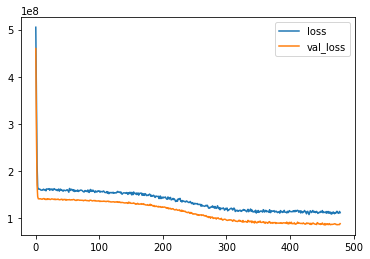

In [26]:
losses = pd.DataFrame(model_4.history.history)
losses.plot()

In [27]:
prediction = model_4.predict(test_dataset)
np.sqrt(MSE(test_label, prediction))

9422.092467765106

## Conclusión y pruebas unitarias

Como vemos la tasa de error del modelo 1 Ridge es el que tiene la menor tasa de error dado el `Minimum Square Error` de 5843.

In [28]:
train_dataset.columns

Index(['year', 'model_ A Class', 'model_ A1', 'model_ A2', 'model_ A3',
       'model_ A4', 'model_ A5', 'model_ A6', 'model_ A7', 'model_ A8',
       'model_ Accent', 'model_ Amica', 'model_ Auris', 'model_ Avensis',
       'model_ Aygo', 'model_ B Class', 'model_ C Class', 'model_ C-HR',
       'model_ CL Class', 'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ Camry', 'model_ Corolla', 'model_ E Class',
       'model_ G Class', 'model_ GL Class', 'model_ GLA Class',
       'model_ GLB Class', 'model_ GLC Class', 'model_ GLE Class',
       'model_ GLS Class', 'model_ GT86', 'model_ Getz', 'model_ Hilux',
       'model_ I10', 'model_ I20', 'model_ I30', 'model_ I40', 'model_ I800',
       'model_ IQ', 'model_ IX20', 'model_ IX35', 'model_ Ioniq',
       'model_ Kona', 'model_ Land Cruiser', 'model_ M Class',
       'model_ PROACE VERSO', 'model_ Prius', 'model_ Q2', 'model_ Q3',
       'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R Class', 'mo

Predataset para el user_input

Ejemplo de input

In [29]:
def Preprocess(year, transmission, model, brand):
    user_input = pd.DataFrame(data = {'year':0, 'model_ A Class':0, 'model_ A1':0, 'model_ A2':0, 'model_ A3':0,
       'model_ A4':0, 'model_ A5':0, 'model_ A6':0, 'model_ A7':0, 'model_ A8':0,
       'model_ Accent':0, 'model_ Amica':0, 'model_ Auris':0, 'model_ Avensis':0,
       'model_ Aygo':0, 'model_ B Class':0, 'model_ C Class':0, 'model_ C-HR':0,
       'model_ CL Class':0, 'model_ CLA Class':0, 'model_ CLC Class':0, 'model_ CLK':0,
       'model_ CLS Class':0, 'model_ Camry':0, 'model_ Corolla':0, 'model_ E Class':0,
       'model_ G Class':0, 'model_ GL Class':0, 'model_ GLA Class':0,
       'model_ GLB Class':0, 'model_ GLC Class':0, 'model_ GLE Class':0,
       'model_ GLS Class':0, 'model_ GT86':0, 'model_ Getz':0, 'model_ Hilux':0,
       'model_ I10':0, 'model_ I20':0, 'model_ I30':0, 'model_ I40':0, 'model_ I800':0,
       'model_ IQ':0, 'model_ IX20':0, 'model_ IX35':0, 'model_ Ioniq':0,
       'model_ Kona':0, 'model_ Land Cruiser':0, 'model_ M Class':0,
       'model_ PROACE VERSO':0, 'model_ Prius':0, 'model_ Q2':0, 'model_ Q3':0,
       'model_ Q5':0, 'model_ Q7':0, 'model_ Q8':0, 'model_ R Class':0, 'model_ R8':0,
       'model_ RAV4':0, 'model_ RS3':0, 'model_ RS4':0, 'model_ RS5':0, 'model_ RS6':0,
       'model_ RS7':0, 'model_ S Class':0, 'model_ S3':0, 'model_ S4':0, 'model_ S5':0,
       'model_ S8':0, 'model_ SL CLASS':0, 'model_ SLK':0, 'model_ SQ5':0,
       'model_ SQ7':0, 'model_ Santa Fe':0, 'model_ Supra':0, 'model_ TT':0,
       'model_ Terracan':0, 'model_ Tucson':0, 'model_ Urban Cruiser':0,
       'model_ V Class':0, 'model_ Veloster':0, 'model_ Verso':0, 'model_ Verso-S':0,
       'model_ X-CLASS':0, 'model_ Yaris':0, 'model_180':0, 'model_200':0, 'model_220':0,
       'model_230':0, 'transmission_Automatic':0, 'transmission_Manual':0,
       'transmission_Other':0, 'transmission_Semi-Auto':0, 'Brand_Audi':0,
       'Brand_Bmw':0, 'Brand_Hyundi':0, 'Brand_Merc':0, 'Brand_Toyota':0}, index=[0])
    
    # year
    transmission = f"transmission_{transmission}"
    model = f"model_ {model}"
    brand = f"Brand_{brand}"
    
    user_input['year'] = year
    user_input[transmission] = 1
    user_input[model] = 1
    user_input[brand] = 1
    
    return user_input

In [30]:
year = 2017
transmission = 'Manual'
model = 'A1'
brand = 'Audi'

input_dataset = Preprocess(year, transmission, model, brand)

In [31]:
predicction = model_1.predict(input_dataset)
print(f"Dado los datos de entrada, año: {year}, transmission: {transmission}, model: {model}, brand: {brand}")
print("Se predice que el precio es: {:.2f}".format(predicction[0]))

Dado los datos de entrada, año: 2017, transmission: Manual, model: A1, brand: Audi
Se predice que el precio es: 14326.41


## Interfaz de Usuario